# Recurrent Neural Networks (RNN)

Recurrent Neural Networks (RNN) are a type of artificial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words.

## How it Works

Unlike traditional neural networks, which process inputs independently, RNNs have loops that allow information to be passed from one step in the sequence to the next. This gives them a kind of memory.

An RNN works by maintaining a hidden state that it updates each time it processes a new input. The hidden state is a function of both the current input and the previous hidden state. This allows the network to incorporate information from the entire history of inputs it has seen so far.

## Use Cases

RNNs have a wide range of applications, including:

- **Natural Language Processing (NLP)**: RNNs are used for language modeling, machine translation, speech recognition, and text generation.

- **Time Series Prediction**: RNNs can model temporal dependencies in data, making them useful for predicting future values in a time series, such as stock prices or weather patterns.

- **Music and Video Analysis**: RNNs can generate music and analyze video by understanding the temporal dependencies in the data.

## Limitations

Despite their advantages, RNNs also have some limitations:

- **Vanishing and Exploding Gradients**: During training, RNNs can suffer from vanishing or exploding gradients, making them hard to train effectively over long sequences.

- **Memory of Past Inputs**: While RNNs theoretically have infinite memory of past inputs, in practice, they can only remember information from a limited number of steps in the past.

- **Computational Intensity**: RNNs can be computationally intensive to train, particularly for long sequences.

- **Interpretability**: Like other deep learning models, RNNs can be seen as "black boxes" and can be difficult to interpret. This can make it challenging to understand why a particular prediction was made.

# Рекуррентные нейронные сети (RNN)

Рекуррентные нейронные сети (RNN) - это тип искусственных нейронных сетей, разработанных для распознавания шаблонов в последовательностях данных, таких как текст, геномы, почерк или устная речь.

## Как это работает

В отличие от традиционных нейронных сетей, которые обрабатывают входы независимо, RNN имеют циклы, которые позволяют передавать информацию от одного шага в последовательности к следующему. Это дает им своего рода память.

RNN работает, поддерживая скрытое состояние, которое обновляется каждый раз, когда она обрабатывает новый вход. Скрытое состояние является функцией как текущего входа, так и предыдущего скрытого состояния. Это позволяет сети включать информацию из всей истории входов, которые она видела до сих пор.

## Варианты использования

У RNN есть широкий спектр применений, включая:

- **Обработка естественного языка (NLP)**: RNN используются для моделирования языка, машинного перевода, распознавания речи и генерации текста.

- **Прогнозирование временных рядов**: RNN могут моделировать временные зависимости в данных, что делает их полезными для прогнозирования будущих значений во временном ряду, таких как цены на акции или погодные условия.

- **Анализ музыки и видео**: RNN могут генерировать музыку и анализировать видео, понимая временные зависимости в данных.

## Ограничения

Несмотря на их преимущества, у RNN также есть некоторые ограничения:

- **Исчезающие и взрывающиеся градиенты**: Во время обучения RNN могут страдать от исчезающих или взрывающихся градиентов, что делает их трудными для эффективного обучения на длинных последовательностях.

- **Память о прошлых входах**: Хотя у RNN теоретически есть бесконечная память о прошлых входах, на практике они могут помнить информацию только из ограниченного числа шагов в прошлом.

- **Вычислительная интенсивность**: RNN могут быть вычислительно интенсивными для обучения, особенно для длинных последовательностей.

- **Интерпретируемость**: Как и другие модели глубокого обучения, RNN могут рассматриваться как "черные ящики" и могут быть сложными для интерпретации. Это может затруднить понимание причин, по которым был сделан определенный прогноз.

# Hyperparameters / model

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from keras.datasets import imdb
from keras.preprocessing import sequence
from tqdm import tqdm

# Hyperparameters
vocab_size = 10000
embedding_dim = 64
hidden_dim = 256
output_dim = 1
n_layers = 2
bidirectional = True
dropout = 0.5
batch_size = 64
num_epochs = 20
maxlen = 500
subset_size = None
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class RNN(nn.Module):
    """
    This class defines the structure of the RNN model.

    Attributes:
        embedding (nn.Embedding): The embedding layer
        rnn (nn.RNN): The RNN layer
        fc (nn.Linear): The fully connected layer
        dropout (nn.Dropout): The dropout layer
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        """
        The constructor for RNN class.

        Parameters:
           vocab_size (int): Size of the vocabulary
           embedding_dim (int): Number of dimensions for word embeddings
           hidden_dim (int): Number of hidden dimensions
           output_dim (int): Number of output dimensions
           n_layers (int): Number of layers
           bidirectional (bool): If True, becomes a bidirectional RNN
           dropout (float): Dropout rate
          """
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        """
        Defines the computation performed at every call.

        Parameters:
            text (torch.Tensor): Tensor of text

        Returns:
            torch.Tensor: Tensor after applying the layers
        """
        embedded = self.dropout(self.embedding(text))
        _, hidden = self.rnn(embedded)
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        return self.fc(hidden.squeeze(0))

class IMDBDataset():
    """
    This class handles the IMDB dataset.

    Attributes:
        num_words (int): Number of words to consider from the dataset
        maxlen (int): Maximum length of the sequences
        subset_size (int): Size of the subset of data to consider
    """
    def __init__(self, num_words, maxlen, subset_size=None):
        """
        The constructor for IMDBDataset class.

        Parameters:
           num_words (int): Number of words to consider from the dataset
           maxlen (int): Maximum length of the sequences
           subset_size (int, optional): Size of the subset of data to consider
        """
        self.num_words = num_words
        self.maxlen = maxlen
        self.subset_size = subset_size

    def load_data(self):
        """
        Loads and preprocesses the IMDB dataset.

        Returns:
            tuple: Tuple containing training and testing data and labels
        """
        (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=self.num_words)
        if self.subset_size is not None:
            train_data = sequence.pad_sequences(train_data[:self.subset_size], maxlen=self.maxlen)
            train_labels = train_labels[:self.subset_size]
        else:
            train_data = sequence.pad_sequences(train_data, maxlen=self.maxlen)
        test_data = sequence.pad_sequences(test_data, maxlen=self.maxlen)
        return (train_data, train_labels), (test_data, test_labels)

# Train

In [2]:
# Load and preprocess the IMDB dataset
dataset = IMDBDataset(vocab_size, maxlen, subset_size)
(train_data, train_labels), (test_data, test_labels) = dataset.load_data()

# Instantiate the model
model = RNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout)

# Check if CUDA is available and print it
if torch.cuda.is_available():
    print("CUDA is available. Training on GPU.")
else:
    print("CUDA is not available. Training on CPU.")

# Move the model to the device
model = model.to(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters())

# Training loop
train_losses = []
val_losses = []
train_accs = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    print(f'Starting epoch {epoch+1}/{num_epochs}')
    train_loss = 0
    train_correct = 0
    total = 0
    for i in tqdm(range(0, len(train_data), batch_size)):  # Add progress bar
        batch_data = torch.tensor(train_data[i:i+batch_size]).t().to(device)  # Transpose the data and move to device
        batch_labels = torch.tensor(train_labels[i:i+batch_size]).float().to(device)  # Convert labels to float and move to device
        optimizer.zero_grad()
        outputs = model(batch_data).squeeze(1)  # Squeeze the outputs
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        predicted = torch.round(torch.sigmoid(outputs))
        total += batch_labels.size(0)
        train_correct += (predicted == batch_labels).sum().item()
    train_losses.append(train_loss / len(train_data))
    train_accs.append(100 * train_correct / total)

    # Validation loop for each epoch
    model.eval()
    val_loss = 0
    val_correct = 0
    total = 0
    with torch.no_grad():
        for i in range(0, len(test_data), batch_size):  # Corrected variable names
            batch_data = torch.tensor(test_data[i:i+batch_size]).t().to(device)  # Corrected variable names
            batch_labels = torch.tensor(test_labels[i:i+batch_size]).float().to(device)  # Corrected variable names
            outputs = model(batch_data).squeeze(1)  # Squeeze the outputs
            loss = criterion(outputs, batch_labels)
            val_loss += loss.item()
            predicted = torch.round(torch.sigmoid(outputs))
            total += batch_labels.size(0)
            val_correct += (predicted == batch_labels).sum().item()
    val_losses.append(val_loss / len(test_data))  # Corrected variable names
    val_accs.append(100 * val_correct / total)

print("Testing...")
# Testing loop
model.eval()
true_labels = []
pred_labels = []
pred_probs = []
with torch.no_grad():
    for i in tqdm(range(0, len(test_data), batch_size)):  # Add progress bar
        batch_data = torch.tensor(test_data[i:i+batch_size]).t().to(device)  # Transpose the data and move to device
        batch_labels = torch.tensor(test_labels[i:i+batch_size]).float().to(device)  # Convert labels to float and move to device
        outputs = model(batch_data).squeeze(1)  # Squeeze the outputs
        predicted = torch.round(torch.sigmoid(outputs))
        true_labels.extend(batch_labels.tolist())
        pred_labels.extend(predicted.tolist())
        pred_probs.extend(torch.sigmoid(outputs).tolist())

CUDA is available. Training on GPU.
Starting epoch 1/20


100%|██████████| 391/391 [00:20<00:00, 19.52it/s]


Starting epoch 2/20


100%|██████████| 391/391 [00:20<00:00, 19.16it/s]


Starting epoch 3/20


100%|██████████| 391/391 [00:21<00:00, 18.54it/s]


Starting epoch 4/20


100%|██████████| 391/391 [00:20<00:00, 19.06it/s]


Starting epoch 5/20


100%|██████████| 391/391 [00:20<00:00, 19.16it/s]


Starting epoch 6/20


100%|██████████| 391/391 [00:20<00:00, 19.15it/s]


Starting epoch 7/20


100%|██████████| 391/391 [00:20<00:00, 19.21it/s]


Starting epoch 8/20


100%|██████████| 391/391 [00:20<00:00, 19.14it/s]


Starting epoch 9/20


100%|██████████| 391/391 [00:20<00:00, 19.14it/s]


Starting epoch 10/20


100%|██████████| 391/391 [00:20<00:00, 19.18it/s]


Starting epoch 11/20


100%|██████████| 391/391 [00:20<00:00, 19.26it/s]


Starting epoch 12/20


100%|██████████| 391/391 [00:20<00:00, 19.39it/s]


Starting epoch 13/20


100%|██████████| 391/391 [00:20<00:00, 18.87it/s]


Starting epoch 14/20


100%|██████████| 391/391 [00:20<00:00, 18.97it/s]


Starting epoch 15/20


100%|██████████| 391/391 [00:20<00:00, 19.08it/s]


Starting epoch 16/20


100%|██████████| 391/391 [00:20<00:00, 19.12it/s]


Starting epoch 17/20


100%|██████████| 391/391 [00:20<00:00, 19.17it/s]


Starting epoch 18/20


100%|██████████| 391/391 [00:20<00:00, 19.16it/s]


Starting epoch 19/20


100%|██████████| 391/391 [00:20<00:00, 19.20it/s]


Starting epoch 20/20


100%|██████████| 391/391 [00:20<00:00, 18.89it/s]


Testing...


100%|██████████| 391/391 [00:07<00:00, 50.68it/s]


In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

def plot_loss_accuracy(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracies')

    plt.show()

def plot_confusion_matrix(true_labels, pred_labels):
    cm = confusion_matrix(true_labels, pred_labels)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_roc_curve(true_labels, pred_probs):
    fpr, tpr, _ = roc_curve(true_labels, pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

The first set of graphs represent the Training and Validation Losses, and Accuracies over time. 
These graphs help us understand how well our model is learning and generalizing to unseen data.

Первый набор графиков представляет собой потери и точность обучения и проверки со временем. 
Эти графики помогают нам понять, насколько хорошо наша модель обучается и обобщает невиданные данные.


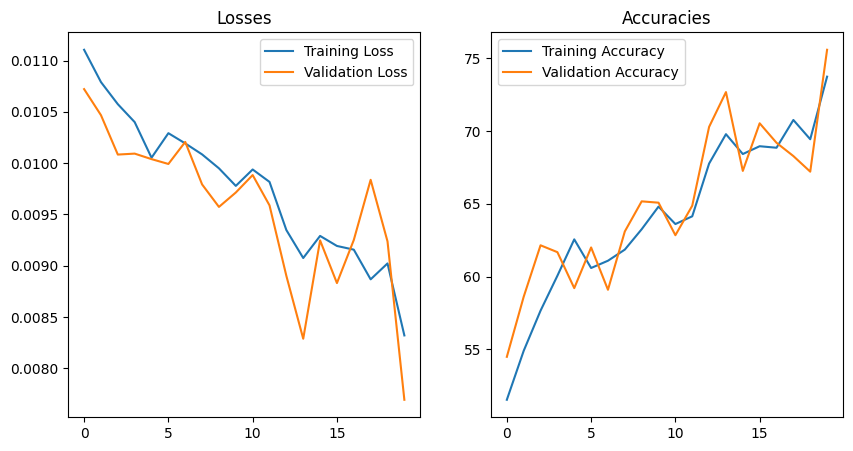

In [8]:
# Plot loss and accuracy
print("The first set of graphs represent the Training and Validation Losses, and Accuracies over time. \
\nThese graphs help us understand how well our model is learning and generalizing to unseen data.")
print("\nПервый набор графиков представляет собой потери и точность обучения и проверки со временем. \
\nЭти графики помогают нам понять, насколько хорошо наша модель обучается и обобщает невиданные данные.")
plot_loss_accuracy(train_losses, val_losses, train_accs, val_accs)


The next graph is a Confusion Matrix. It shows the number of correct and incorrect predictions made by the model, 
broken down by each category. The diagonal elements represent the number of points for which the predicted label 
is equal to the true label.

Следующий график - это матрица ошибок. Он показывает количество правильных и неправильных прогнозов, сделанных моделью, 
разбитых по каждой категории. Диагональные элементы представляют количество точек, для которых прогнозируемая метка 
совпадает с истинной меткой.


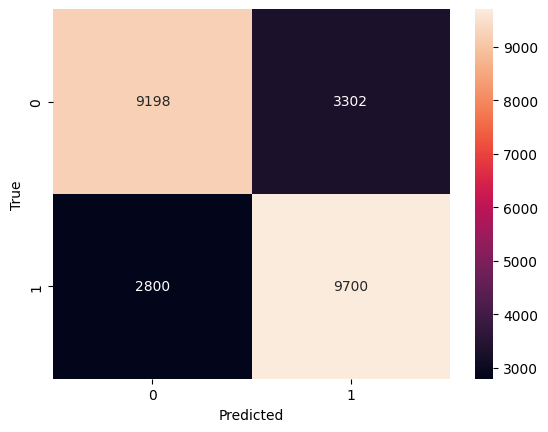

In [5]:
# Plot confusion matrix
print("\nThe next graph is a Confusion Matrix. It shows the number of correct and incorrect predictions made by the model, \
\nbroken down by each category. The diagonal elements represent the number of points for which the predicted label \
\nis equal to the true label.")
print("\nСледующий график - это матрица ошибок. Он показывает количество правильных и неправильных прогнозов, сделанных моделью, \
\nразбитых по каждой категории. Диагональные элементы представляют количество точек, для которых прогнозируемая метка \
\nсовпадает с истинной меткой.")
plot_confusion_matrix(true_labels, pred_labels)


The final graph is a Receiver Operating Characteristic (ROC) curve. It illustrates the performance of our model 
by showing the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. 
The area under the curve (AUC) gives us a single metric to compare models.

Последний график - это кривая рабочей характеристики приемника (ROC). Он иллюстрирует эффективность нашей модели, 
показывая истинную положительную частоту (TPR) по сравнению с ложной положительной частотой (FPR) при различных настройках порога. 
Площадь под кривой (AUC) дает нам единую метрику для сравнения моделей.


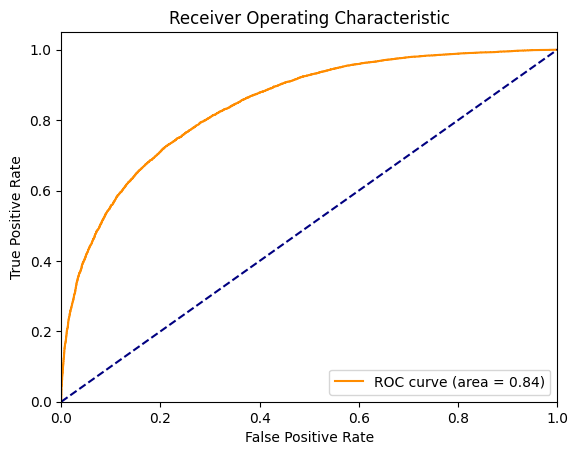

In [6]:
# Plot ROC curve
print("\nThe final graph is a Receiver Operating Characteristic (ROC) curve. It illustrates the performance of our model \
\nby showing the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. \
\nThe area under the curve (AUC) gives us a single metric to compare models.")
print("\nПоследний график - это кривая рабочей характеристики приемника (ROC). Он иллюстрирует эффективность нашей модели, \
\nпоказывая истинную положительную частоту (TPR) по сравнению с ложной положительной частотой (FPR) при различных настройках порога. \
\nПлощадь под кривой (AUC) дает нам единую метрику для сравнения моделей.")
plot_roc_curve(true_labels, pred_probs)

In [7]:
def predict(model, data, label, device):
    model.eval()
    with torch.no_grad():
        data_tensor = torch.tensor(data).unsqueeze(0).t().to(device)  # Add batch dimension and move to device
        output = model(data_tensor)  # Remove .squeeze(1)
        prediction = torch.sigmoid(output)  # Apply sigmoid to get the predicted probability
    return data, prediction.item(), label

# Get a sample from the dataset
sample_data = test_data[5]
sample_label = test_labels[5]

# Predict on the sample
sample_data, pred_prob, true_label = predict(model, sample_data, sample_label, device)

# Convert the sample data back to text
index_to_word = {value: key for key, value in imdb.get_word_index().items()}
sample_text = ' '.join(index_to_word.get(index - 3, '') for index in sample_data).strip()

# Calculate the predicted label
pred_label = "Positive" if round(pred_prob) == 1 else "Negative"

print(f'Text: {sample_text}')
print(f'Predicted Probability: {pred_prob}')
print(f'Predicted Label: {pred_label}')
print(f'True Label: {"Positive" if true_label == 1 else "Negative"}')


1641221/1641221 [==============================] - 0s 0us/step
Text: i'm absolutely disgusted this movie isn't being sold all who love this movie should email disney and increase the demand for it they'd eventually have to sell it then i'd buy copies for everybody i know everything and everybody in this movie did a good job and i haven't figured out why disney hasn't put this movie on dvd or on vhs in rental stores at least i haven't seen any copies this is a wicked good movie and should be seen by all the kids in the new generation don't get to see it and i think they should it should at least be put back on the channel this movie doesn't deserve a cheap  it deserves the real thing i'm them now this movie will be on dvd
Predicted Probability: 0.5140053033828735
Predicted Label: Positive
True Label: Positive
